### Problem Statement: Analyze the effectiveness of prediction algorithms on stock market data and get general insight on this data through visualization to predict future stock behavior and value at risk for each stock. 

#### Import Libraries

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# For division
from __future__ import division
# For time stamps
from datetime import datetime

In [3]:
# imports for stock specific data
from nsepy import get_history
import pyfolio as pf
import yfinance as yf

C:\Users\poorn\AppData\Local\Continuum\anaconda3\lib\site-packages\empyrical\utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)
C:\Users\poorn\AppData\Local\Continuum\anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [4]:
#Getting date and time for window
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
# Stock options (for index options, set index = True)
stock_df = get_history(symbol="HDFC",start=start,end=end)
 
stock_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-05-26,HDFC,EQ,1516.15,1516.0,1568.15,1486.0,1506.40,1502.15,1513.16,12752510,1.929655e+15,410460,6413212,0.5029
2020-05-27,HDFC,EQ,1502.15,1513.0,1578.00,1490.0,1570.55,1570.40,1534.78,12428432,1.907488e+15,387154,6420302,0.5166
2020-05-28,HDFC,EQ,1570.40,1580.0,1643.80,1577.0,1633.00,1623.70,1620.61,10262028,1.663072e+15,301812,4577838,0.4461
2020-05-29,HDFC,EQ,1623.70,1615.9,1676.35,1590.9,1667.00,1658.90,1639.09,13809103,2.263438e+15,365281,7019870,0.5084
2020-06-01,HDFC,EQ,1658.90,1706.6,1764.85,1701.3,1732.00,1737.70,1737.54,8056778,1.399895e+15,245505,3441571,0.4272


In [6]:
# Summary stats for HDFC stock
stock_df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,2.510000e+02,251.000000
mean,2187.383068,2191.354183,2221.569323,2160.481076,2191.237052,2191.424303,2190.820040,4.752084e+06,1.017594e+15,169852.788845,2.401001e+06,0.506794
std,364.248949,364.642507,366.263002,357.397294,361.919569,362.394263,361.222513,2.194255e+06,4.294848e+14,60741.859652,1.156539e+06,0.086236
min,1502.150000,1513.000000,1568.150000,1486.000000,1506.400000,1502.150000,1513.160000,3.742860e+05,8.662943e+13,19227.000000,8.603800e+04,0.229900
25%,1817.700000,1819.500000,1844.900000,1801.500000,1820.250000,1820.050000,1821.170000,3.245535e+06,7.156587e+14,129286.500000,1.615710e+06,0.450100
50%,2253.950000,2253.950000,2289.450000,2221.200000,2253.050000,2256.250000,2257.070000,4.230162e+06,9.163074e+14,157122.000000,2.165140e+06,0.510000
75%,2515.075000,2515.600000,2546.825000,2486.600000,2516.600000,2516.800000,2514.455000,5.584374e+06,1.245020e+15,200446.000000,2.843498e+06,0.567350
max,2860.450000,2871.000000,2896.000000,2838.000000,2861.550000,2860.450000,2867.920000,1.682963e+07,3.192430e+15,538170.000000,7.019870e+06,0.715100


In [7]:
# General Info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2020-05-26 to 2021-05-25
Data columns (total 14 columns):
Symbol                251 non-null object
Series                251 non-null object
Prev Close            251 non-null float64
Open                  251 non-null float64
High                  251 non-null float64
Low                   251 non-null float64
Last                  251 non-null float64
Close                 251 non-null float64
VWAP                  251 non-null float64
Volume                251 non-null int64
Turnover              251 non-null float64
Trades                251 non-null int64
Deliverable Volume    251 non-null int64
%Deliverble           251 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.4+ KB


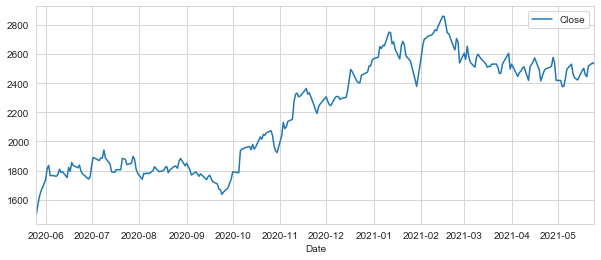

In [9]:
# Let's see a historical view of the closing price
stock_df['Close'].plot(legend=True, figsize=(10,4))

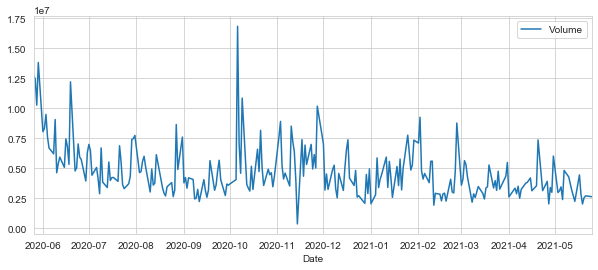

In [10]:
# Now let's plot the total volume of stock being traded each day over the past year

stock_df['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
# Let's go ahead and caculate the moving average for the stock.
# Pandas has a built-in rolling mean calculator

MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    stock_df[column_name] = stock_df['Close'].rolling(ma).mean()

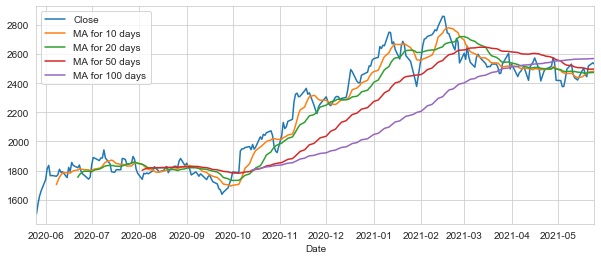

In [12]:
#lets plot all the additional Moving Averages 
stock_df[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

In [13]:
# Import pandas and create a placeholder for the data
data = pd.DataFrame()


In [14]:
# Feth the data
ticker = 'HDFCBANK.NS'
data[ticker] = yf.download(ticker, period='5y',)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [15]:
# Compute the returns and then compute the daily mean returns.
data = data.pct_change().dropna().mean(axis=1)

In [16]:
# Print first 5 rows of the data
data.head()

Date
2016-05-26    0.008480
2016-05-27    0.003000
2016-05-30   -0.005941
2016-05-31    0.001822
2016-06-01   -0.005711
dtype: float64

Start date,2016-05-26
End date,2021-05-25
Total months,58
,Backtest
Annual return,21.6%
Cumulative returns,159.7%
Annual volatility,24.8%
Sharpe ratio,0.91
Calmar ratio,0.53
Stability,0.80
Max drawdown,-41.1%


C:\Users\poorn\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.05,2019-12-23,2020-03-24,2020-11-06,230
1,15.96,2021-02-16,2021-04-12,NaT,NaN
2,13.19,2018-07-27,2018-10-31,2019-03-13,164
3,13.13,2019-07-02,2019-08-23,2019-09-23,60
4,11.21,2016-09-23,2016-11-24,2017-02-06,97


Stress Events,mean,min,max
New Normal,0.09%,-12.61%,11.60%


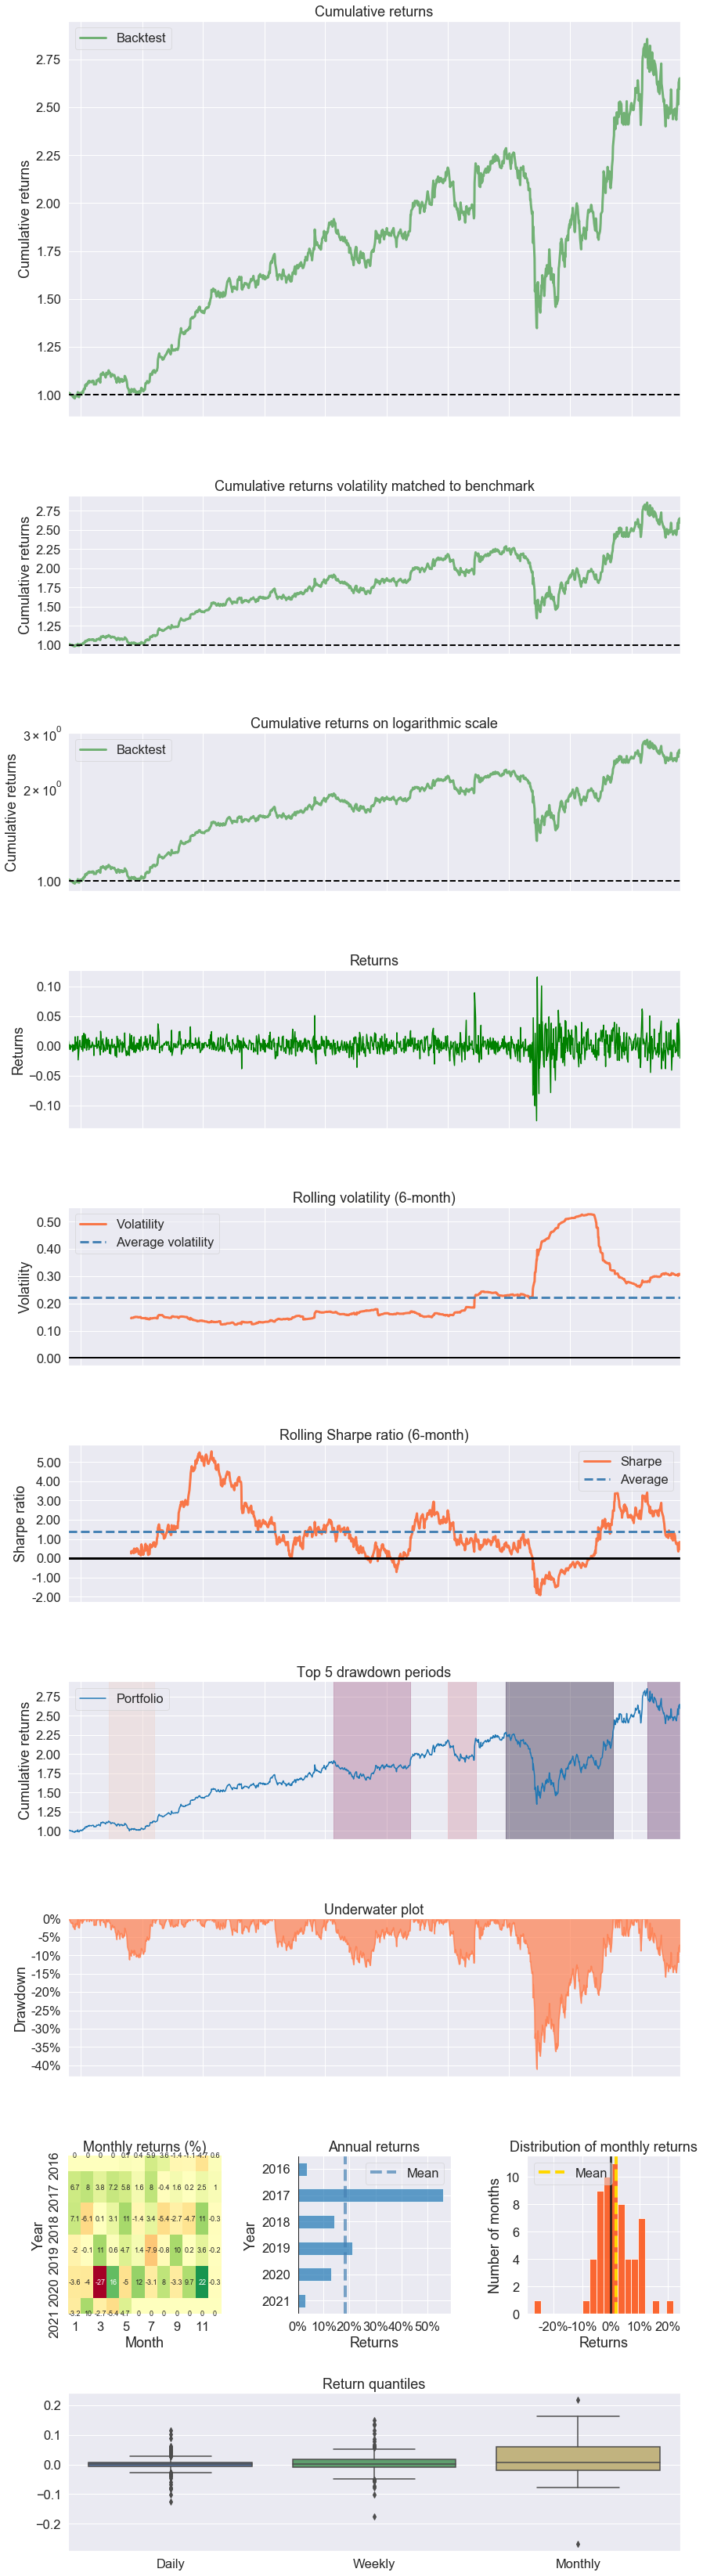

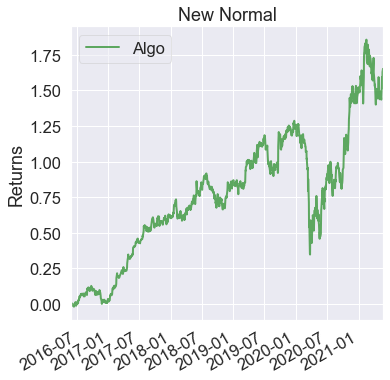

In [17]:
pf.create_full_tear_sheet(data)

#### Daily Return Analysis

##### Let's take a closer look at the daily changes of the stock and use pandas to retrieve the daily returns for the stock.

In [18]:
# We'll use pct_change to find the percent change for each day
stock_df['Daily Return'] = stock_df['Close'].pct_change()

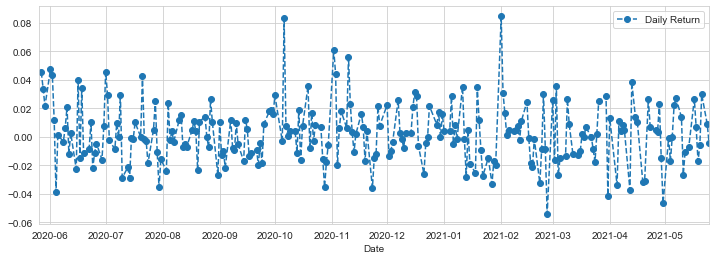

In [19]:
# Lets plot the daily return percentage
stock_df['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

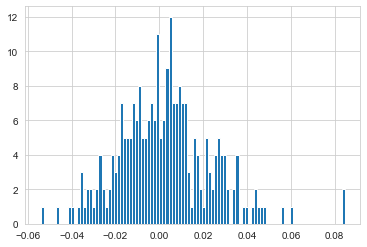

In [20]:
# only with histogram
stock_df['Daily Return'].hist(bins=100)

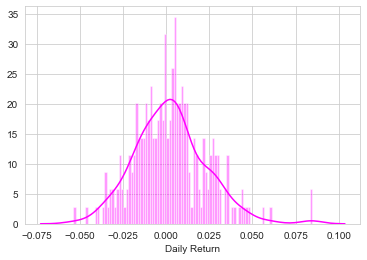

In [21]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(stock_df['Daily Return'].dropna(), bins=100, color='magenta')

#### Risk Analysis

In [22]:
closingprice_df = stock_df['Close']

In [23]:
closingprice_df=closingprice_df.to_frame()

In [24]:
closingprice_df

,Close
Date,
2020-05-26,1502.15
2020-05-27,1570.40
2020-05-28,1623.70
2020-05-29,1658.90
2020-06-01,1737.70
...,...
2021-05-19,2459.85
2021-05-20,2445.00
2021-05-21,2518.05


In [25]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()
rets = tech_returns.dropna()

In [26]:
rets

,Close
Date,
2020-05-27,0.045435
2020-05-28,0.033940
2020-05-29,0.021679
2020-06-01,0.047501
2020-06-02,0.043650
...,...
2021-05-19,-0.017180
2021-05-20,-0.006037
2021-05-21,0.029877


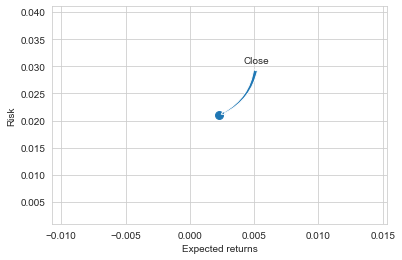

In [27]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

##### This stock has lower risk and positive expected returns.

#### Value at Risk

##### Value at risk can be defined as the amount of money we could expect to lose for a given confidence interval. There's several methods we can use for estimating a value at risk

##### Value at risk using the "bootstrap" method. For this method we will calculate the empirical quantiles from a histogram of daily returns


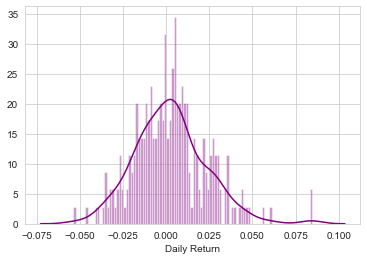

In [28]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(stock_df['Daily Return'].dropna(),bins=100,color='purple')

In [29]:
# Now we can use quantile to get the risk value for the stock.
# The 0.05 empirical quantile of daily returns

rets["Close"].quantile(0.05)

-0.030025239265149616

##### The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, our worst daily loss will not exceed 3.0%. If we invest 10000 INR then our daily loss will not be more than 10000 * 0.030 = 300 INR

#### Value at Risk using the Monte Carlo method

In [30]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['Close']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['Close']

##### Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns

In [31]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for HDFC')

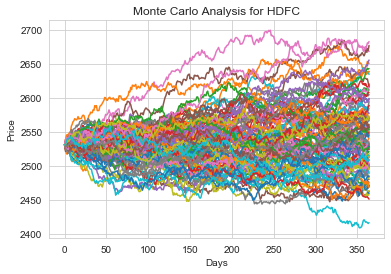

In [32]:
start_price = closingprice_df.iloc[-1, closingprice_df.columns.get_loc("Close")]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for HDFC')

###### Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [33]:

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

##### Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

Text(0.5, 1.0, 'Final price distribution for HDFC after 365 days')

C:\Users\poorn\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


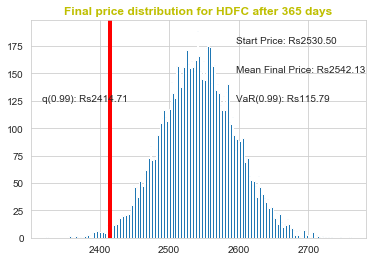

In [34]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: Rs%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: Rs%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): Rs%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): Rs%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for HDFC after %s days" % days, weight='bold', color='Y')

##### Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the stock, which looks to be Rs65.68 for every investment of 1502.15 .

##### This basically means for every initial stock you purchase you're putting about Rs65.68 at risk 99% of the time from our Monte Carlo Simulation.

In [35]:
# Predicted final Price 
simulations.mean()

2542.133058457925